Imports

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer

A1

In [25]:
def calculate_entropy(y, n_bins=4):
    if np.issubdtype(y.dtype, np.number):
        kbd = KBinsDiscretizer(n_bins=n_bins, strategy='uniform')
        y = kbd.fit_transform(y.reshape(-1, 1)).toarray().ravel()
    
    unique_values, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    return -np.sum(probabilities * np.log2(probabilities + 1e-10))

df = pd.read_csv('face_data_multi.csv')
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

print(f"Dataset Entropy: {calculate_entropy(y):.4f}")

Dataset Entropy: 0.8113


A2

In [26]:
def calculate_gini(y):
    unique_values, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    return 1 - np.sum(probabilities ** 2)

print(f"Gini Index: {calculate_gini(y):.4f}")

Gini Index: 0.7371


A3,A4

In [27]:
def calculate_entropy(y):
    unique_labels, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    return -np.sum(probabilities * np.log2(probabilities + 1e-10))

def find_best_pixel(X, y, n_bins=4):
    base_entropy = calculate_entropy(y)
    best_gain = -1
    best_pixel = None
    
    for pixel_idx in range(X.shape[1]):
        pixel_values = X[:, pixel_idx]
        
        bins = np.linspace(pixel_values.min(), pixel_values.max(), n_bins + 1)
        binned_values = np.digitize(pixel_values, bins[:-1])
        
        pixel_entropy = 0
        for bin_val in range(1, n_bins + 1):
            mask = binned_values == bin_val
            if mask.any():
                subset_y = y[mask]
                weight = len(subset_y) / len(y)
                pixel_entropy += weight * calculate_entropy(subset_y)
        
        gain = base_entropy - pixel_entropy
        if gain > best_gain:
            best_gain = gain
            best_pixel = pixel_idx
    
    return best_pixel, best_gain

best_pixel, gain = find_best_pixel(X, y)
print(f"Best pixel for root node: {best_pixel}")
print(f"Information gain: {gain:.4f}")

Best pixel for root node: 1896
Information gain: 0.0257


A5,A6

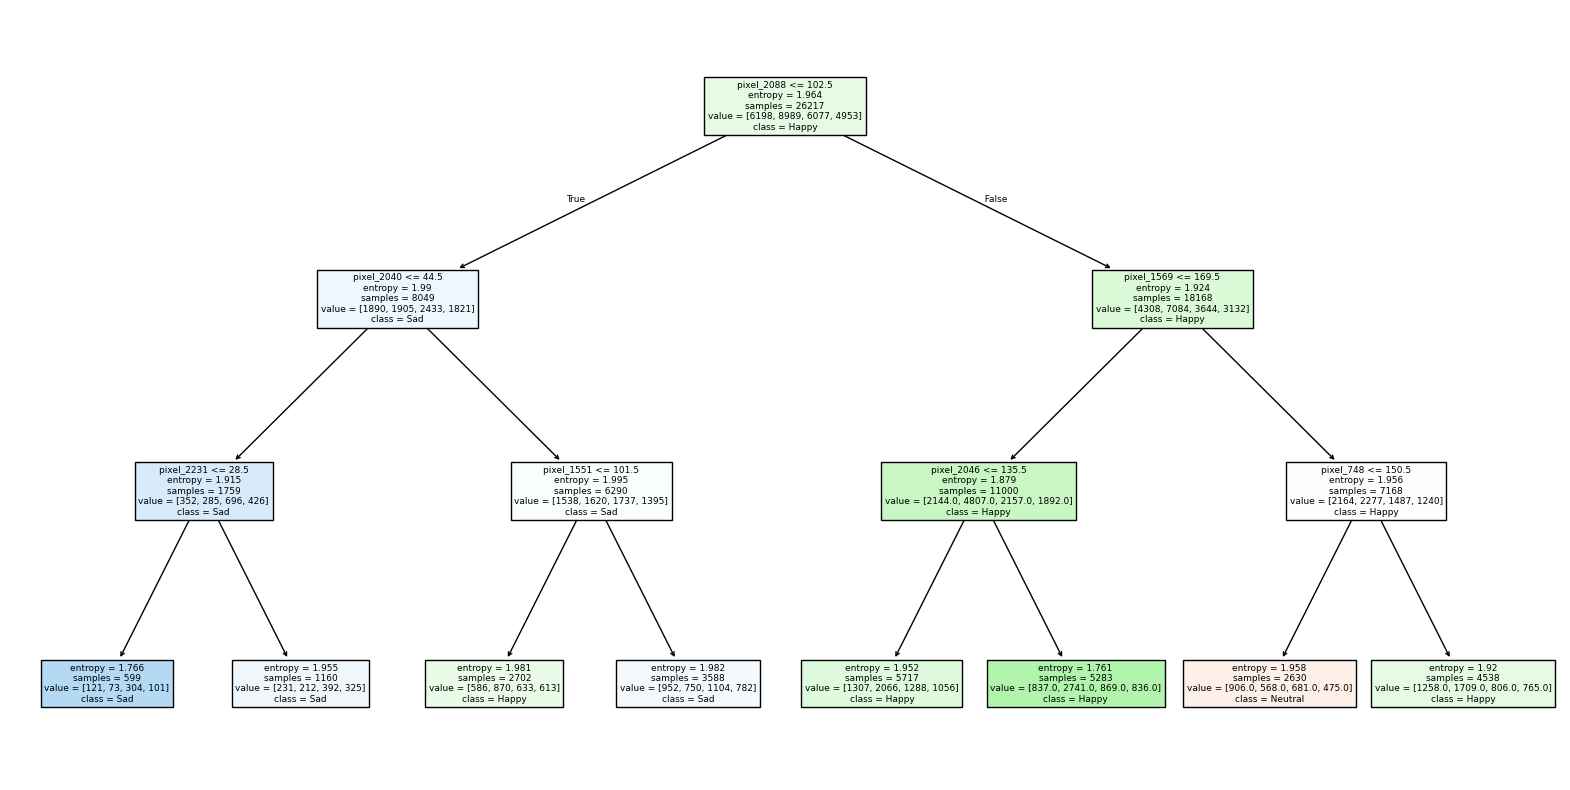

In [28]:
class FaceEmotionTree:
    def __init__(self, max_depth=3):
        self.clf = DecisionTreeClassifier(
            max_depth=max_depth,
            criterion='entropy',
            random_state=42
        )
        
    def fit(self, X, y):
        self.clf.fit(X, y)
        return self
    
    def visualize(self):
        plt.figure(figsize=(20, 10))
        plot_tree(
            self.clf,
            feature_names=[f'pixel_{i}' for i in range(X.shape[1])],
            class_names=['Neutral', 'Happy', 'Sad', 'Angry'],
            filled=True
        )
        plt.show()

tree = FaceEmotionTree(max_depth=3)
tree.fit(X, y)
tree.visualize()

A7

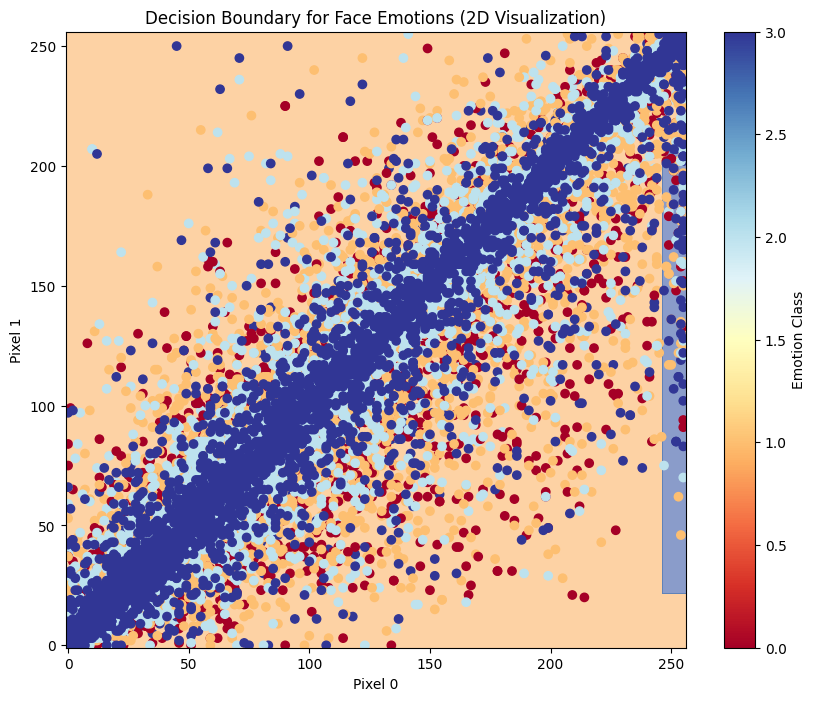

In [29]:
def plot_decision_boundary(X, y, feature1=0, feature2=1, max_depth=3):
    X_subset = X[:, [feature1, feature2]]
    tree_2d = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    tree_2d.fit(X_subset, y)
    
    h = 0.02
    x_min, x_max = X_subset[:, 0].min() - 1, X_subset[:, 0].max() + 1
    y_min, y_max = X_subset[:, 1].min() - 1, X_subset[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    
    Z = tree_2d.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.6)
    plt.scatter(X_subset[:, 0], X_subset[:, 1], c=y, cmap=plt.cm.RdYlBu)
    plt.xlabel(f'Pixel {feature1}')
    plt.ylabel(f'Pixel {feature2}')
    plt.title('Decision Boundary for Face Emotions (2D Visualization)')
    plt.colorbar(label='Emotion Class')
    plt.show()

plot_decision_boundary(X, y, feature1=0, feature2=1)